# **DATA 311 UBCO, Tree Classification implemented in Python**

## **Assignment 3, CART:**

### **Classification Tree Implementation:**

Up until this point all of the trees we built were for Regression,
for this notebook we will use regular CART & RF models for Classification instead of Regression


In [57]:
##decleration & data first as always

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import log_loss
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
# from sklearn.ensemble import BaggingRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('datasalaries.csv')
df.head(10)

,company,totalyearlycompensation,yearsofexperience,yearsatcompany,gender,Race,Education
0,Google,400000,5,5,Male,Asian,PhD
1,Microsoft,136000,3,2,Male,Two Or More,Bachelor's Degree
2,Google,337000,6,6,Male,Asian,Bachelor's Degree
3,Microsoft,222000,4,4,Male,Asian,Master's Degree
4,Amazon,310000,15,3,Male,Asian,Bachelor's Degree
5,Amazon,620000,19,7,Male,Asian,Bachelor's Degree
6,Apple,180000,1,1,Male,Asian,Bachelor's Degree
7,Amazon,210000,4,1,Male,Hispanic,Highschool
8,Amazon,142000,0,0,Male,Asian,Master's Degree
9,Facebook,242000,2,2,Male,White,Master's Degree


### **Another 25 75 train test split for the road:**

In [58]:
n = df.shape[0]
i = np.random.permutation(n)

train_size = round(0.75*n)
test_size = n - train_size

train = i[:train_size]
test = i[:test_size]

training_data = df.iloc[train]
testing_data = df.iloc[test]

training_data.columns

Index(['company', 'totalyearlycompensation', 'yearsofexperience',
       'yearsatcompany', 'gender', 'Race', 'Education'],
      dtype='object')

### **First we add the Decision Tree Classifier:**

    this is what we did in part 6, but with 'DecisionTreeClassifier' instead of 'DecisionTreeRegressor'

In [59]:

y_train = training_data['company']
x_train = pd.get_dummies(training_data.drop('company', axis=1))

y_test = testing_data['company']
x_test = pd.get_dummies(testing_data.drop('company', axis=1))

cla_tree = DecisionTreeClassifier().fit(x_train, y_train)
cla_tree_pruned = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)

tree_predictions        = cla_tree       .predict(x_test)
tree_predictions_pruned = cla_tree_pruned.predict(x_test)


### **Then we plot the first Tree:**

    we add class_names=cla_tree_pruned.classes_ to the plot_tree function so we can get class = company[] instead of a few numbers

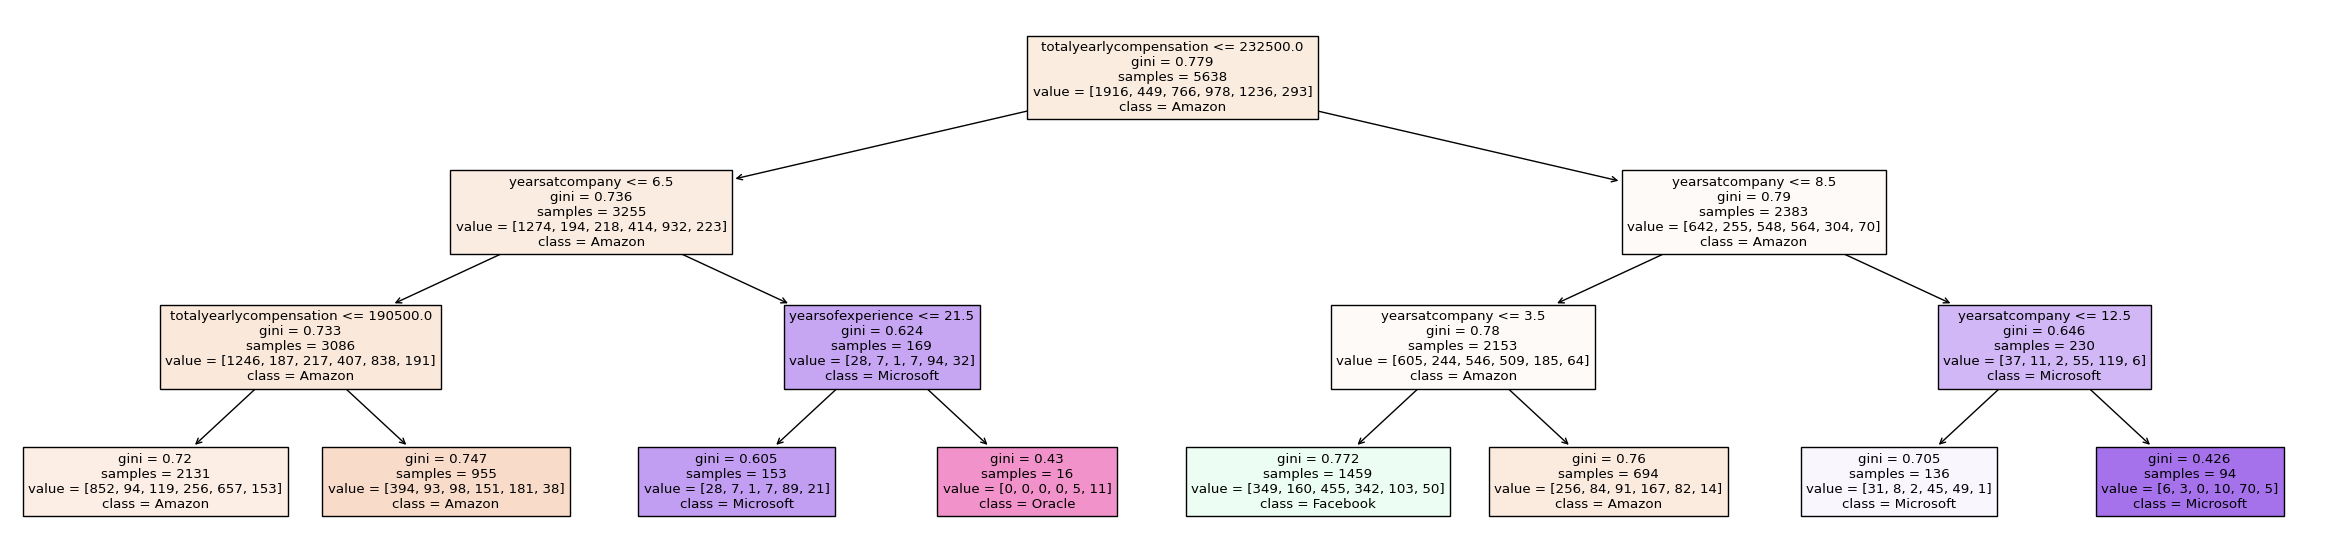

In [60]:
plt.figure(figsize=(30, 7))
plot_tree(cla_tree_pruned, filled=True, feature_names=x_train.columns, class_names=cla_tree_pruned.classes_); plt.show() # type: ignore

### **Then we add the Random Forest Classifier:**

    this is what we did in part 8, but with 'RandomForestClassifier' instead of 'RandomForestRegressor'

In [62]:
x_train = pd.get_dummies(training_data.drop('company', axis=1)); y_train = training_data['company']

rf        = RandomForestClassifier(             n_estimators=500, random_state=42).fit(x_train, y_train)
rf_pruned = RandomForestClassifier(max_depth=3, n_estimators=500, random_state=42).fit(x_train, y_train)

In [63]:
x_test = pd.get_dummies(testing_data.drop('company', axis=1)); y_test = testing_data['company']

rf_predictions        = rf       .predict(x_test)
rf_predictions_pruned = rf_pruned.predict(x_test)

### **Then we plot our Second Tree:**

    we add class_names=rf_pruned.classes_ to the plot_tree function just like the last one

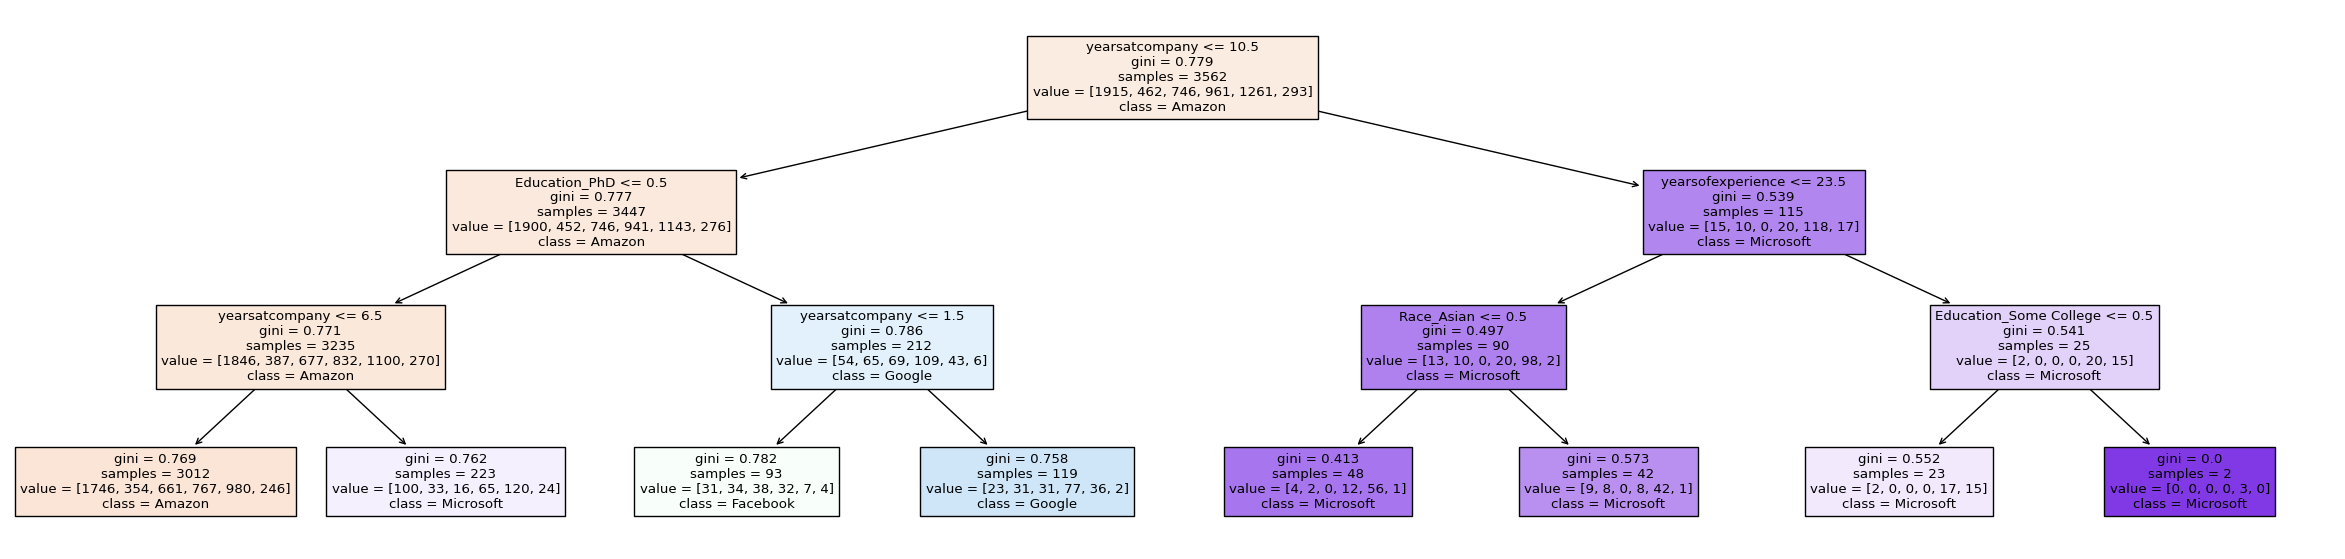

In [64]:
plot = rf_pruned.estimators_[0]

plt.figure(figsize=(30, 7))
plot_tree(plot, filled=True, feature_names=x_train.columns, class_names=rf_pruned.classes_); plt.show()# type: ignore

### **Predictions & Accuracy:**

here are the predicted companies:

In [65]:
outDF = pd.DataFrame(testing_data)

outDF['Tree predictions'] = tree_predictions; outDF['Pruned Tree predictions'] = tree_predictions_pruned; outDF['Forest predictions'] = rf_predictions; outDF['Pruned Forest predictions'] = rf_predictions_pruned
outDF['Actual'] = outDF['company']

outDF['Tree predictions'] = outDF['Tree predictions'].astype('string');               outDF['Forest predictions'] = outDF['Forest predictions'].astype('string')
outDF['Pruned Tree predictions'] = outDF['Pruned Tree predictions'].astype('string'); outDF['Pruned Forest predictions'] = outDF['Pruned Forest predictions'].astype('string')


outDF = outDF[['Tree predictions', 'Pruned Tree predictions', 'Forest predictions', 'Pruned Forest predictions', 'Actual'] + ['company', 'yearsofexperience', 'yearsatcompany', 'gender', 'Race', 'Education']]

outDF.head(15)

,Tree predictions,Pruned Tree predictions,Forest predictions,Pruned Forest predictions,Actual,company,yearsofexperience,yearsatcompany,gender,Race,Education
2374,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,1,1,Male,White,Bachelor's Degree
5103,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,5,5,Female,Asian,Master's Degree
1193,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,8,7,Male,White,Bachelor's Degree
929,Microsoft,Amazon,Microsoft,Amazon,Microsoft,Microsoft,12,4,Male,White,Master's Degree
888,Microsoft,Microsoft,Microsoft,Amazon,Microsoft,Microsoft,15,7,Male,Hispanic,Bachelor's Degree
2397,Microsoft,Facebook,Microsoft,Amazon,Microsoft,Microsoft,12,0,Male,Black,Master's Degree
2366,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,5,1,Male,Hispanic,Bachelor's Degree
225,Google,Facebook,Google,Amazon,Google,Google,24,1,Male,White,Bachelor's Degree
5782,Amazon,Amazon,Amazon,Amazon,Amazon,Amazon,2,2,Male,Asian,Master's Degree
1014,Microsoft,Amazon,Microsoft,Amazon,Microsoft,Microsoft,5,5,Female,Asian,Bachelor's Degree


^notice the smaller variance (the regression towards the mean  - as in Amazon being over represented) for the pruned trees

and here are the accuracies:

In [81]:
y_test = testing_data['company']

tree_accuracy = accuracy_score(y_test, tree_predictions);   tree_accuracy_pruned = accuracy_score(y_test, tree_predictions_pruned)
rf_accuracy = accuracy_score(y_test, rf_predictions);       rf_accuracy_pruned = accuracy_score(y_test, rf_predictions_pruned)

print("Tree Accuracy:  \t \t Pruned Tree Accuracy:")
print("Accuracy: ", (tree_accuracy*100), "% \t Accuracy: ", (tree_accuracy_pruned*100), " %") # type: ignore

print("Random Forest Accuracy: \t Pruned Random Forest Accuracy:")
print("Accuracy: ", (rf_accuracy*100), "% \t Accuracy: ", (rf_accuracy_pruned*100), "%") # type: ignore


Tree Accuracy:  	 	 Pruned Tree Accuracy:
Accuracy:  97.28579031399681 % 	 Accuracy:  39.16977115486961  %
Random Forest Accuracy: 	 Pruned Random Forest Accuracy:
Accuracy:  96.70037253858436 % 	 Accuracy:  36.987759446514104 %


there seems to be a slight over-fit on the RF model, but both had a great accuracy

### **Next Notebooks: PCA & Ridge/Lasso**